<a href="https://colab.research.google.com/github/mithun-martin/MACHINE-LEARNING/blob/main/CNN_Model_to_classify_cat_and_dog_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
!pip install tensorflow

In [2]:
# ---------------------------
# 1. Config
# ---------------------------
IMG_SIZE = 150
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

In [3]:
def preprocess(image, label):
    image = tf.image.resize(image,(IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label


In [4]:
# 3. Load dataset with train/val/test split
# ---------------------------
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],  # 70/15/15 split
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.S2RPZD_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [5]:
# ---------------------------
# 4. Prepare pipelines
# ---------------------------
ds_train = (ds_train
            .map(preprocess, num_parallel_calls=AUTOTUNE)
            .shuffle(1000)
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE))

ds_val = (ds_val
          .map(preprocess, num_parallel_calls=AUTOTUNE)
          .batch(BATCH_SIZE)
          .prefetch(AUTOTUNE))

ds_test = (ds_test
           .map(preprocess, num_parallel_calls=AUTOTUNE)
           .batch(BATCH_SIZE)
           .prefetch(AUTOTUNE))

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),

    tf.keras.layers.Dense(1,activation="sigmoid")




])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:

# ---------------------------
# 6. Compile model
# ---------------------------
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:

# ---------------------------
# 7. Train model
# ---------------------------
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10
)


Epoch 1/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.5996 - loss: 0.6605 - val_accuracy: 0.7404 - val_loss: 0.5271
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.7594 - loss: 0.4975 - val_accuracy: 0.7860 - val_loss: 0.4591
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8031 - loss: 0.4227 - val_accuracy: 0.7868 - val_loss: 0.4675
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8477 - loss: 0.3442 - val_accuracy: 0.8086 - val_loss: 0.4330
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8853 - loss: 0.2677 - val_accuracy: 0.8201 - val_loss: 0.4923
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.9272 - loss: 0.1841 - val_accuracy: 0.8149 - val_loss: 0.6022
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.9585 - loss: 0.1082 - val_accuracy: 0.7991 - val_loss: 0.8014
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.9735 - loss: 0.0723 - 

In [18]:
test_loss, test_acc = model.evaluate(ds_test)
print("Loss:", test_loss)
print("Accuracy:", test_acc)


110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8130 - loss: 0.7755
Loss: 0.8311286568641663
Accuracy: 0.8022356033325195


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


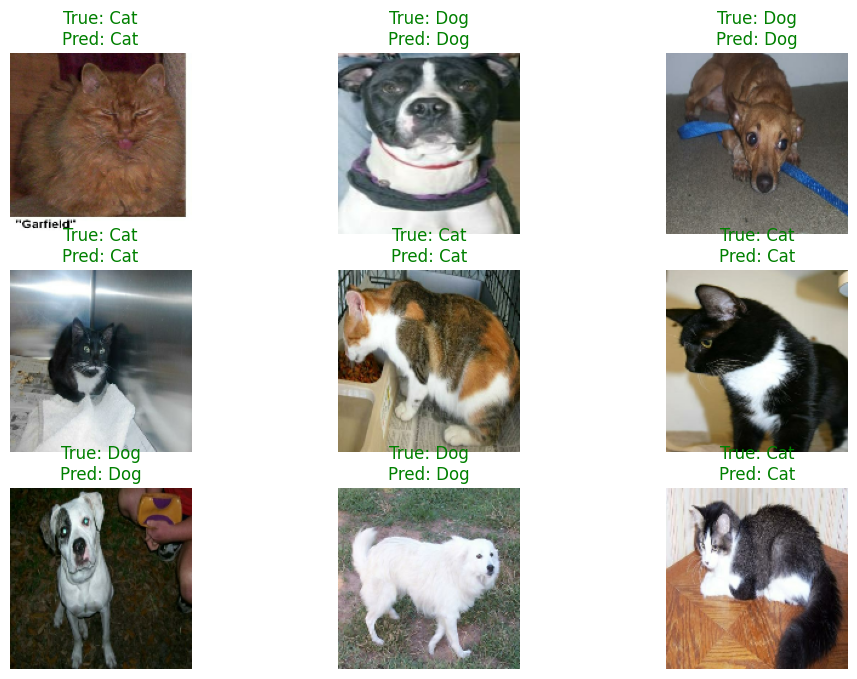

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch of test images & labels
for images, labels in ds_test.take(1):
    preds = model.predict(images)  # probabilities between 0 and 1
    preds = (preds > 0.5).astype(int)  # convert to 0/1 classes

    plt.figure(figsize=(12, 8))
    for i in range(9):  # show first 9 images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.axis("off")
        true_label = "Dog" if labels[i].numpy() == 1 else "Cat"
        pred_label = "Dog" if preds[i][0] == 1 else "Cat"
        color = "green" if true_label == pred_label else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.show()
